# Sport climbing situation in Poland

In this project I would like to extract some in-depth knowledge about sport climbing situation in Poland. The base of my project will be data web scrapped from site 'wspinanie.pl'. The site provides large database of climbing routes in Poland and abroad. I will put my interest specifically on the most popular Polish climbing area - Jura Krakowsko-Częstochowska. Let's begin!

The first step would be importing important packages.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

The next step would be importing database into the project as pandas dataframe. Database called 'data.csv' is file created by Python script called 'web_scraping.py'. Both are placed in the 'PLClimbingStats' folder.

In [2]:
df = pd.read_csv('data.csv', names=['Nazwa', 'Rejon', 'Skała', 'Wysokość', 'Trudność', 'Orientacja', 'Ubezpieczenie'])
df.head()

,Nazwa,Rejon,Skała,Wysokość,Trudność,Orientacja,Ubezpieczenie
0,Bramki Na Wyjeździe Liczą Się Podwójnie,Karniowickie Skały,Trybuna A,6,V+,pionowa,ubezpieczona
1,Cześć i dziękuję za ryby,Apteka,Apteka - ściana północno-wschodnia,22,IV+,pionowa,ubezpieczona
2,Debiut w Dubiu,Dolina Racławki,Jupiter,14,V,pionowa,ubezpieczona
3,Drobne cwaniaczki,Góra Zamkowa,Biały Filar i Dziurawa,15,VI.2,pionowa,ubezpieczona
4,Droga Bały (2 wyciąg),Sokolica,Sokolica,30,IV,pionowa,asekuracja własna


In [3]:
len(df)

7148

Loaded dataframe consists of 7 columns and 7148 rows. I used attibute 'names=' to specify column names, because data.csv doesn't provide ones.

In the next step I need to remove obviously wrong rows. To proceed, I'm going to take a look into routes unique height and difficulty values.

In [4]:
sorted(df['Wysokość'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 34,
 35,
 40,
 45,
 50,
 55,
 60]

In [5]:
sorted(df['Trudność'].unique())

['6c',
 '6c+',
 '7a',
 '7a+',
 '7b+',
 '?',
 'I',
 'II',
 'III',
 'III+',
 'IV',
 'IV+',
 'IV-',
 'V',
 'V+',
 'V-',
 'VI',
 'VI+',
 'VI+/1',
 'VI-',
 'VI.1',
 'VI.1+',
 'VI.1+/2',
 'VI.2',
 'VI.2+',
 'VI.2+/3',
 'VI.2/2+',
 'VI.3',
 'VI.3+',
 'VI.3+/4',
 'VI.3/3+',
 'VI.4',
 'VI.4+',
 'VI.4+/5',
 'VI.4/4+',
 'VI.5',
 'VI.5+',
 'VI.5+/6',
 'VI.5/5+',
 'VI.6',
 'VI.6+',
 'VI.6+/7',
 'VI.6/6+',
 'VI.7',
 'VI.7+',
 'VI.7/7+',
 'VI.8']

Positions including route height from 0 to 2 meters and difficulty of "?" are obviously wrong and will be removed. I will also remove rows with difficulty desribed in other scales than "Kurtyka's Scale", since they are not used in Poland. 

In [6]:
df = df[~df['Trudność'].isin(['6c', '6c+', '7a', '7a+', '7b+', '?'])]
df = df[~df['Wysokość'].isin([0, 1, 2])]

In [7]:
7148 - len(df)

365

I managed to reduce dataframe by 365 corrupted rows. It's time get some basic knowledge out of our database. Let's see what are highest and most difficult climbing routes.

In [8]:
df.sort_values(by='Wysokość', ascending=False).head(20)

,Nazwa,Rejon,Skała,Wysokość,Trudność,Orientacja,Ubezpieczenie
3030,Lewy Komin,Sokolica,Sokolica,60,V,mieszana,ubezpieczona
856,Cech rzemiosł różnych,Zimny Dół,Łysina,55,VI-,pionowa,ubezpieczona
5996,Syndrom póły,Zimny Dół,Łysina,55,VI+/1,pionowa,ubezpieczona
6241,Trawers Sadystówki,Zakrzówek,Sadystówka,50,VI.3,pionowa,boulder
5953,Superdirettissima,Sokolica,Sokolica,50,VI.4+,pionowa,ubezpieczona
1278,Droga Gruchy,Brodło,Brodło,50,IV+,pionowa,asekuracja własna
1036,Czerwone światła na Mt. Cassino,Sokolica,Sokolica,45,VI.5/5+,pionowa,ubezpieczona
1838,Golumek Konfucjusz Kurt,Sokolica,Sokolica,45,VI.5,pionowa,ubezpieczona
6650,Wiosenne Palenie Trawy,Sokolica,Sokolica,45,VI.2,pionowa,ubezpieczona
6644,Wimbledon,Zimny Dół,Łysina,40,VI.3+,mieszana,ubezpieczona


In [9]:
df.sort_values(by='Trudność', ascending=False).head(20)

,Nazwa,Rejon,Skała,Wysokość,Trudność,Orientacja,Ubezpieczenie
3142,Made in Poland,Góra Zamkowa,Wielka Cima,30,VI.8,mieszana,ubezpieczona
5797,Sprawa honoru,Grupa Mamutowej Skały,Jaskinia Mamutowa,30,VI.8,mieszana,ubezpieczona
192,Arachnofobia,Okręt,Okręt,14,VI.8,pionowa,ubezpieczona
4055,Pandemonium,Gołębnik,Gołębnik,25,VI.8,mieszana,ubezpieczona
3778,Nieznośna lekkość bytu,Grupa Mamutowej Skały,Jaskinia Mamutowa,25,VI.7/7+,przewieszona,ubezpieczona
207,Atak bezzębnego szkraba,Rejon Dziewicy,Dziewica,15,VI.7+,przewieszona,ubezpieczona
6006,Szaleństwo ludzi zdrowych,Grupa Mamutowej Skały,Jaskinia Mamutowa,25,VI.7+,przewieszona,ubezpieczona
4396,Power of Love 1/2,Góra Zamkowa,Wielka Cima,20,VI.7+,mieszana,ubezpieczona
2844,Las Vegas Parano,Grupa Mamutowej Skały,Jaskinia Mamutowa,28,VI.7+,mieszana,ubezpieczona
6081,Szydercze zwierciadło,Zapad,Zapad,14,VI.7+,mieszana,ubezpieczona


It may be also interesting to inspect which region has the most of the Polish sport climbing routes. For that I'm going to create another dataframe from grouped size of region rows.

In [10]:
df_region = df.groupby(['Rejon']).size().reset_index(name='Ilość')
df_region.sort_values(by='Ilość', ascending=False).head(20)

,Rejon,Ilość
22,Dolina Brzoskwinki,268
194,Słoneczne Skały,215
67,Góra Zamkowa,174
158,Rejon Turni Lechfora,154
207,Wąwóz Ostryszni,119
221,Zegarowe Skały,108
153,Rejon Słonecznej,105
142,Rejon Dziewicy,102
227,Łyse Skały,100
140,Rejon Bońka,100


For further operations I need to give weight to difficulty scale, so it can be described in int value. 

In [11]:
weight = {
 'I': 1,
 'II': 2,
 'III': 3,
 'III+': 4,
 'IV': 6,
 'IV+': 7,
 'IV-': 5,
 'V': 9,
 'V+': 10,
 'V-': 8,
 'VI': 12,
 'VI+': 13,
 'VI+/1': 14,
 'VI-': 11,
 'VI.1': 15,
 'VI.1+': 16,
 'VI.1+/2': 17,
 'VI.2': 18,
 'VI.2+': 20,
 'VI.2+/3': 21,
 'VI.2/2+': 19,
 'VI.3': 22,
 'VI.3+': 24,
 'VI.3+/4': 25,
 'VI.3/3+': 23,
 'VI.4': 26,
 'VI.4+': 28,
 'VI.4+/5': 29,
 'VI.4/4+': 27,
 'VI.5': 30,
 'VI.5+': 32,
 'VI.5+/6': 33,
 'VI.5/5+': 31,
 'VI.6': 34,
 'VI.6+': 36,
 'VI.6+/7': 37,
 'VI.6/6+': 35,
 'VI.7': 38,
 'VI.7+': 40,
 'VI.7/7+': 39,
 'VI.8': 41}

Now I can plot relation between height, difficulty and amount of climbing routes.

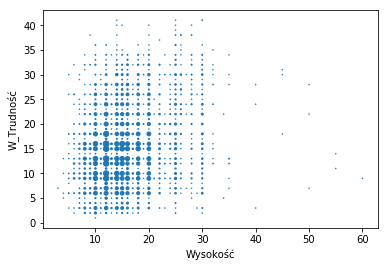

In [13]:
df_HD = df[['Trudność', 'Wysokość']]
df_HD.loc[:, 'W_Trudność'] = [weight[key] for key in df_HD['Trudność']]
df_HD = df_HD.groupby(by=['W_Trudność', 'Trudność', 'Wysokość']).size().reset_index(name='Ilość')
df_HD.plot.scatter(x='Wysokość', y='W_Trudność', s=df_HD['Ilość']*0.3)

As we can see most of Polish sport climbing routes are between 10 and 20 meters high. Weighted difficulty of the most routes oscilates between 6 and 18, which means difficulties from IV to VI.2. Results seems to be expected as difficulties from IV to VI.2 cover the range from beginner to expert climbers. Routes rated below IV are considered suitable for entry level climbers. On the other hand routes above VI.2 level are reserved for most experienced climbers.

I decided to add next functionality to the database and created a simple script defining geolocalization for the regions in 'data.csv'. Script is called 'geoloc.py' and creates database called 'geoloc.csv'. Both are placed in the 'PLClimbingStats' folder. I'm going to import 'geoloc.csv' into the project as pandas dataframe.

In [14]:
df_loc = pd.read_csv('geoloc.csv', names=['Rejon', 'Szerokość', 'Długość'])
df_loc.head()

,Rejon,Szerokość,Długość
0,Góra Zamkowa,49.355276,20.890936
1,Diabelskie Mosty,50.683146,19.410280
2,Suchy Połeć,50.459481,19.552958
3,Okiennik Będkowski,50.175333,19.745229
4,Gaj,49.523889,20.598056


In [15]:
len(df_loc)

144

In [16]:
df['Rejon'].nunique() - len(df_loc)

87

Script 'geoloc.py' uses geopy and Nominatim to search for localization. As we can see some of regions are missing, simply because they were not found. Also, some of the rows have wrong values for sure. I'm going to tighten area to Jura Krakowsko-Częstochowska.

In [17]:
df_loc = df_loc[((df_loc['Szerokość'] <= 50.9) & (df_loc['Szerokość'] >= 49.9)) & ((df_loc['Długość'] >= 18.9) & (df_loc['Długość'] <= 20.2))]

In [18]:
len(df_loc)

115

Procedure took away a bunch of obviously wrong localized regions. Let's see where are most of the climbing regions in Poland.

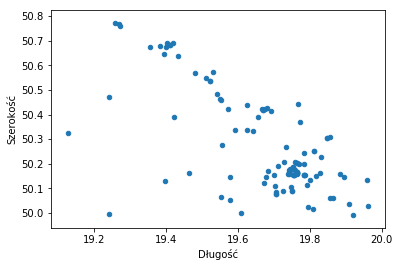

In [19]:
df_loc.plot.scatter(x='Długość', y='Szerokość')

Most of the regions seem to be located in area of longitude between 19.65° and 20° and latitude between 50° and 50,3°. Let's include amount of climbing routes as chart point size and plot results. I will use dataframes 'df_regions' and 'df_loc' to exclude regions with missing/corrupted localization. Then I will include longitude and latitude from 'df_loc'.

In [20]:
df_region_loc = df_region[df_region['Rejon'].isin(df_loc['Rejon'])]
df_region_loc.loc[:, 'Szerokość'] = [df_loc['Szerokość'][df_loc['Rejon'] == x].values[0]  for x in df_region_loc['Rejon']]
df_region_loc.loc[:, 'Długość'] = [df_loc['Długość'][df_loc['Rejon'] == x].values[0]  for x in df_region_loc['Rejon']]

In [21]:
sum(df_region_loc['Ilość'])

3395

Unfortunately about 50% of database is lost during the process. Hopefully remaining info is good enough. Let's plot upgraded chart.

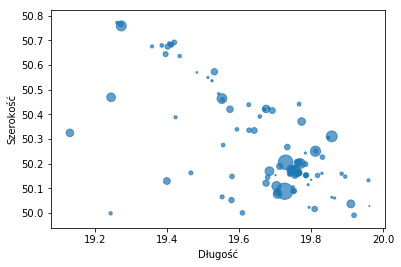

In [22]:
df_region_loc.plot.scatter(x='Długość', y='Szerokość', s=df_region_loc['Ilość'], alpha = 0.7)

Now it seems to be clear - if you're arriving to Jura for climbing, the most interesting place for you is around geopoint of 50.2° , 19.75°. But maybe you're experienced, or maybe just started your climbing adventure? Let's see if the trend still stands for various route difficulties. 

As we know, there are many levels on difficulty scale. To simplify statistics let's define three hypothetic stages of climbing proficiency:

    Beginner - difficulties including and below 'V', which is weighted as 9 in our scale,
    Intermediate - difficulties between 'IV+' and 'VI.3', which are weighted from 7 to 22,
    Expert - difficulties including and above 'VI.2+', weighted as 20.

To proceed I need to create another dataframe including amount of routes in certain difficulties with regions and localization included.

In [23]:
df_diff_region = df.groupby(['Rejon', 'Trudność']).size().reset_index(name='Ilość')
df_diff_region = df_diff_region[df_diff_region['Rejon'].isin(df_loc['Rejon'])]
df_diff_region.loc[:, 'W_Trudność'] = [weight[key] for key in df_diff_region['Trudność']]
df_diff_region.loc[:, 'Szerokość'] = [df_loc['Szerokość'][df_loc['Rejon'] == x].values[0]  for x in df_diff_region['Rejon']]
df_diff_region.loc[:, 'Długość'] = [df_loc['Długość'][df_loc['Rejon'] == x].values[0]  for x in df_diff_region['Rejon']]

Now let's group dataframe three times, depending of defined scale.

In [24]:
df_diff_region_beginner = df_diff_region[df_diff_region['W_Trudność'] <= 9].groupby(['Rejon', 'Szerokość', 'Długość']).size().reset_index(name='Ilość')
df_diff_region_intermediate = df_diff_region[(df_diff_region['W_Trudność'] >= 7) & (df_diff_region['W_Trudność'] <= 22)].groupby(['Rejon', 'Szerokość', 'Długość']).size().reset_index(name='Ilość')
df_diff_region_expert = df_diff_region[df_diff_region['W_Trudność'] >= 20].groupby(['Rejon', 'Szerokość', 'Długość']).size().reset_index(name='Ilość')

It's finally time to plot charts from prepared dataframes.

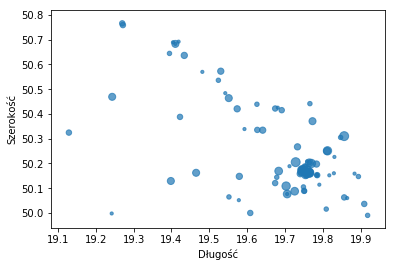

In [25]:
df_diff_region_beginner.plot.scatter(x='Długość', y='Szerokość', s=df_diff_region_beginner['Ilość']*10, alpha = 0.7)

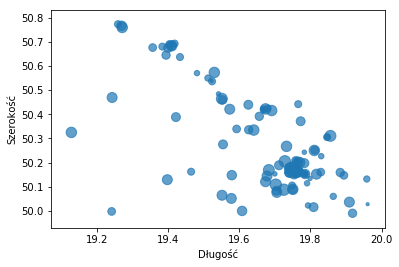

In [26]:
df_diff_region_intermediate.plot.scatter(x='Długość', y='Szerokość', s=df_diff_region_intermediate['Ilość']*10, alpha = 0.7)

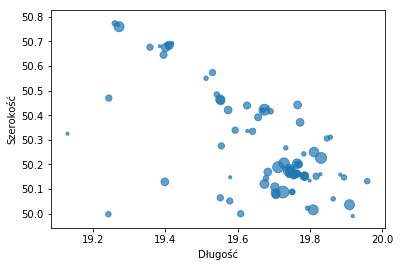

In [27]:
df_diff_region_expert.plot.scatter(x='Długość', y='Szerokość', s=df_diff_region_expert['Ilość']*10, alpha = 0.7)

Trends keep appearing in all three advancement levels. Although you have to be aware of amount/size scaling of the last three charts, which is ten times bigger than on the summed chart from above.